# Fitting Lightcurves using Numpy Polynomial Functions

### Jupyter notebook tutorial by Nathalie Jones (Northwestern, Bard)


In this jupyter notebook I will walk through how to implement 'numpy.polyfit' in order to fit easily customizable polynomial best fit lines to data. This code was originally crafted to plot and fit X-Ray obeservations of molecular cloud flux but this technique can be looked at as an example of how to use 'polyfit' in general.

I also cover how to use the best fit line to find predicted peaks with expected error with less detailed explaination.

This project makes extensive use of matplotlib (https://matplotlib.org/) and numpy (https://numpy.org/) and you will see below that the first step is to import these packages. The matplotlib and numpy teams work hard to keep these packages updated, well documented, and free. 

Thank you to Dr. Shuo Zhang (Bard) for challenging me to improve and fine tune this technique and its fitting capabilities as we applied it to our Galactic Center molecular cloud research.

Thank you also to Julia Sheffler (UW Madison, Bard) for her advice and support as I wrote the original version of this code.

If you use this code outside of personal reference, feel free to credit me or my github repo (https://github.com/nathaliekt/python_projects).

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial as poly #here we import the specifc special function we will use

### Let's start basic. How do we plot data and their error bars?

Here is some data which measures value y in each observation year:


<img src = "testdata.png" width="260" height="277">


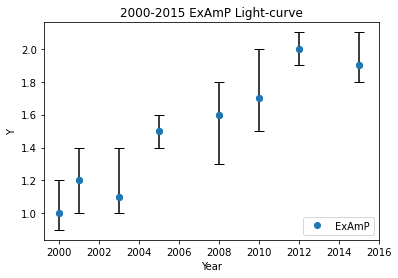

In [8]:
year = [2000, 2001, 2003, 2005, 2008, 2010, 2012, 2015]
y = [1, 1.2, 1.1, 1.5, 1.6, 1.7, 2.0, 1.9 ]

#Also need to list the error bars

errlow = [0.1, 0.2, 0.1, 0.1, 0.3, 0.2, 0.1, 0.1] #contains the expected error below each point
errhigh = [0.2, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2] #contains the expected error above each point
errtotal = [errlow, errhigh] #combines the lower and upper error limits into a matrix to plot both at once


y_plt = plt.plot(year, y, "o", label='ExAmP') #used label tag to indicate inst observed w for example
plt.errorbar(year, y, yerr=errtotal, fmt="o", ecolor='black',capsize=5)


plt.xticks(np.arange(2000, 2018, step=2)) #Here we set the xticks to be whole numbers every two years
plt.ylabel('Y') #don't forget to label your axes!
plt.xlabel('Year')
plt.title('2000-2015 ExAmP Light-curve')
plt.legend(loc='lower right') #Creating a legend uses the info from the label tag earlier!
plt.show()

Looking good! 

### Next step: Improve our light-curve plot by adding a best fit line with numpy.polyfit. 

This command can be confusing at first, so feel free to reference the official documentation: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

I also found this site helpful: https://www.educba.com/numpy-polyfit/

"poly.fit" is useful because we can easily change the type of curve we fit against using the 'deg' argument. We don't have to find individual commands for each type of function! They are all built into "poly.fit":

deg = 1 corresponds to a first order polynomial, aka linear func
deg = 2 is a second order polynomial, aka quadratic
deg = 3 is third order and so on...


Let's first test numpy.polyfit out while learning how to implement it... Let's test numpy.polyfit for a quadratic curve. The test data below is roughly along the curve 

$y(x) = -0.5x^2 + 2x + 4$,

aka polynomial deg = 2. 

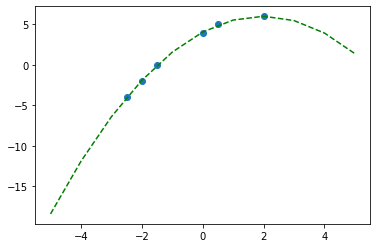

In [11]:
testyr = [-2.5, -2, -1.5, 0, 0.5, 2]
testy = [-4, -2, 0, 4, 5, 6]

test_plt = plt.plot(testyr, testy, "o")

#Now we add polyfit in order to fit the curve with a best fit line

testmod = poly.fit(testyr, testy, deg = 2) #Want to check that we get the quadratic y(x) above, therefore deg = 2

x_s = np.arange(-5,6) #here we define the infinite points of the best fit curve, try varying range

plt.plot(x_s,testmod(x_s),"--g")
plt.show()

Looks pretty quadratic to me! However, we can also use "poly.fit" to get the coefficients of the calculated best fit line, in order to improve this check: aka if y = ax + b, this function will give us the values of a and b. The tricky point here is that the "coef" function prints the coefficients in the opposite order than expected, aka you will get b, a.

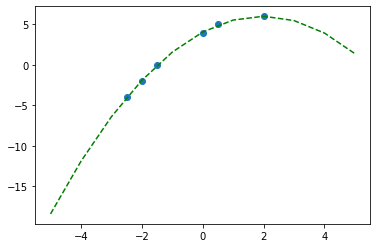

Expect: 4, 2, -0.5
Actual values: [ 4.06286837  1.98282431 -0.5037209 ]


In [13]:
testyr = [-2.5, -2, -1.5, 0, 0.5, 2]
testy = [-4, -2, 0, 4, 5, 6]

test_plt = plt.plot(testyr, testy, "o")
testmod = poly.fit(testyr, testy, deg = 2)
x_s = np.arange(-5,6)

coefcheck = poly.fit(testyr, testy, deg = 2).convert().coef #our coef check function for deg = 2 polynomial

plt.plot(x_s,testmod(x_s),"--g")
plt.show()
print ("Expect: 4, 2, -0.5")
print ("Actual values:", coefcheck)

Our check works!! Now let's apply this method to our lightcurve example data.

fit coef: [-8.39972314e+03  8.30577641e+00 -2.05270622e-03]


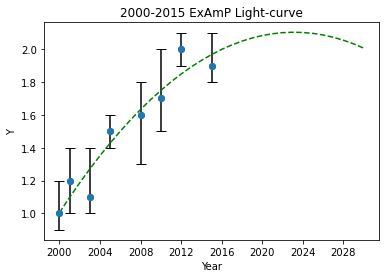

In [21]:
year = [2000, 2001, 2003, 2005, 2008, 2010, 2012, 2015]
y = [1, 1.2, 1.1, 1.5, 1.6, 1.7, 2.0, 1.9 ]

errlow = [0.1, 0.2, 0.1, 0.1, 0.3, 0.2, 0.1, 0.1]
errhigh = [0.2, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2]

errtotal = [errlow, errhigh]

y_plt = plt.plot(year, y, "o", label='ExAmP') #see note
plt.errorbar(year, y, yerr=errtotal, fmt="o", ecolor='black',capsize=5)


fitmod = poly.fit(year, y, deg = 2) #try changing deg and note which deg polynomial fits the data best
x_s = np.arange(2000, 2031) #try varying the np.arange inputs
plt.plot(x_s, fitmod(x_s), "--g")#see note
coef = poly.fit(year, y, deg = 2).convert().coef
print('fit coef:', coef)

plt.xticks(np.arange(2000, 2032, step=4))
plt.ylabel('Y')
plt.xlabel('Year')
plt.title('2000-2015 ExAmP Light-curve')
#plt.legend(loc='lower right')
plt.show()

Note: The two plt.plot functions can be combined into one, aka plt.plot (year, flux, "o", x_s, fluxmod(x_s), "--g"). Functionally it makes no difference but the organizational factor depends on user's preference.

### Now that we successfully fit the data to a best fit curve, how can we glean more information from this plot?

#### Wouldn't it be helpfull to find the peak of this curve too? 

Okay, time for some calculus... How do we find the peak of our curve $y(x) = -0.5x^2 + 2x + 4$ ? Take the first derivative! &rarr; $dy/dx = 0$ is the min/max of the curve.

For general case: $ax^2 + bx + c = g(x)$ 

&rarr; $dg/dx = 2ax + b = 0$, which becomes $x = -b/(2a)$

Threfore our prediction calculation would look like:

**pred = -b/(2*a)** 

Let's add this to our plot below.


fit coef: [-8.39972314e+03  8.30577641e+00 -2.05270622e-03]
Peak Year Prediction (green): 2023.1283822682763


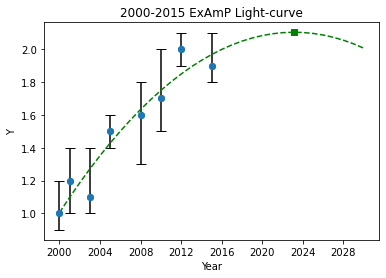

In [4]:
year = [2000, 2001, 2003, 2005, 2008, 2010, 2012, 2015]
y = [1, 1.2, 1.1, 1.5, 1.6, 1.7, 2.0, 1.9 ]

errlow = [0.1, 0.2, 0.1, 0.1, 0.3, 0.2, 0.1, 0.1]
errhigh = [0.2, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2]

errtotal = [errlow, errhigh]

y_plt = plt.plot(year, y, "o", label='ExAmP')
plt.errorbar(year, y, yerr=errtotal, fmt="o", ecolor='black',capsize=5)


fitmod = poly.fit(year, y, deg = 2) 
x_s = np.arange(2000, 2031) 
plt.plot(x_s, fitmod(x_s), "--g")
coef = poly.fit(year, y, deg = 2).convert().coef
print('fit coef:', coef)

# add min/max prediction
b = coef[1] #b is the 1th value of coef 
a = coef[2] #a is the 2th value of coef

yearpred = -b/(2*a)

print('Peak Year Prediction (green):', yearpred)

fitpred = fitmod(yearpred)
plt.scatter(yearpred, fitpred, c="g", marker="s")

plt.xticks(np.arange(2000, 2032, step=4))
plt.ylabel('Y')
plt.xlabel('Year')
plt.title('2000-2015 ExAmP Light-curve')
#plt.legend(loc='lower right')
plt.show()

### We now are able to use our plot to make predictions! Thanks polyfit.

We can even take this further and also find a best fit line and peak prediction for the error bars to get a better estimation:

Note: the tricky part here is that we have to turn our functions into arrays and add or subtract the arrays to get the two new sets of data points.

Peak Year Prediction (green): 2023.1283822682763
Low bound Year Prediction (blue): 2073.0106382978315
Upper bound Year Prediction (red): 2022.1693080027544


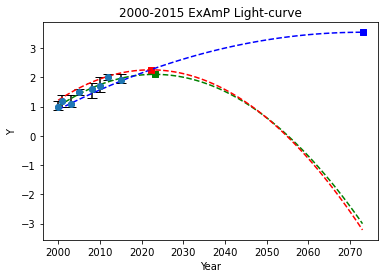

In [12]:
year = [2000, 2001, 2003, 2005, 2008, 2010, 2012, 2015]
y = [1, 1.2, 1.1, 1.5, 1.6, 1.7, 2.0, 1.9 ]

errlow = [0.1, 0.2, 0.1, 0.1, 0.3, 0.2, 0.1, 0.1]
errhigh = [0.2, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2]
errtotal = [errlow, errhigh]

y_plt = plt.plot(year, y, "o", label='ExAmP')
plt.errorbar(year, y, yerr=errtotal, fmt="o", ecolor='black',capsize=5)

fitmod = poly.fit(year, y, deg = 2) 
x_s = np.arange(2000,2036) 
plt.plot(x_s, fitmod(x_s), "--g")
coef = poly.fit(year, y, deg = 2).convert().coef
#print('fit coef:', coef)

b = coef[1] 
a = coef[2] 
yearpred = -b/(2*a)
print('Peak Year Prediction (green):', yearpred)
fitpred = fitmod(yearpred)
plt.scatter(yearpred, fitpred, c="g", marker="s")

#Making functions arrays
y_arr = np.array(y)
errlow_arr = np.array(errlow)
errhigh_arr = np.array(errhigh)
low_y = np.subtract (y_arr, errlow_arr) #new lower range data points
high_y = np.add(y_arr, errhigh_arr) # new upper range data points

#Fitting the lower bound (blue)
low_ymod = poly.fit(year, low_y, deg = 2)
lowyr = np.arange(2000,2036)
plt.plot(lowyr, low_ymod(lowyr),"--b")
lowy_coeff = poly.fit(year, low_y, deg = 2).convert().coef
#print('lowy_coeff:', lowy_coeff)
#consts are f e d 

#Lower bound year pred 
e = lowy_coeff[1]
d = lowy_coeff[2]
yearpred1 = -e/(2*d)
ypred1 = low_ymod(yearpred1)
plt.scatter(yearpred1, ypred1, c="b", marker="s")
print('Low bound Year Prediction (blue):', yearpred1)

#Fitting the Upper bound (red)
high_ymod = poly.fit(year, high_y, deg = 2)
highyr = np.arange(2000,2036) #whats the best range to show the whole plot?
plt.plot(highyr, high_ymod(highyr),"--r")
highy_coeff = poly.fit(year, high_y, deg = 2).convert().coef
#print('highy_coeff:', highy_coeff)
#consts are i h g

#Upper bound year pred
h = highy_coeff[1]
g = highy_coeff[2]
yearpred2 = -h/(2*g)
ypred2 = high_ymod(yearpred2)
plt.scatter(yearpred2, ypred2, c="r", marker="s")
print('Upper bound Year Prediction (red):', yearpred2)

#plt.xticks(np.arange(2000, 2032, step=4))
plt.ylabel('Y')
plt.xlabel('Year')
plt.title('2000-2015 ExAmP Light-curve')
#plt.legend(loc='lower right')
plt.show()